In [93]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [95]:
parkinsons_df = pd.read_csv('parkinsons.csv')

In [97]:
print("\nParkinson's Disease Dataset Columns:") 
print(parkinsons_df.columns)


Parkinson's Disease Dataset Columns:
Index(['name', 'MDVP:Fo(Hz)', 'MDVP:Fhi(Hz)', 'MDVP:Flo(Hz)', 'MDVP:Jitter(%)',
       'MDVP:Jitter(Abs)', 'MDVP:RAP', 'MDVP:PPQ', 'Jitter:DDP',
       'MDVP:Shimmer', 'MDVP:Shimmer(dB)', 'Shimmer:APQ3', 'Shimmer:APQ5',
       'MDVP:APQ', 'Shimmer:DDA', 'NHR', 'HNR', 'status', 'RPDE', 'DFA',
       'spread1', 'spread2', 'D2', 'PPE'],
      dtype='object')


In [99]:
print("Missing values before cleaning:")
print("Parkinsons Dataset:", parkinsons_df.isnull().sum().sum())

Missing values before cleaning:
Parkinsons Dataset: 0


In [101]:
print("Missing values after cleaning:")
print("Parkinsons Dataset:", parkinsons_df.isnull().sum().sum())

Missing values after cleaning:
Parkinsons Dataset: 0


In [103]:
def perform_eda(df, title):
    print(f"EDA for {title}")
    print(df.head())
    print(df.info())
    print(df.describe())
    plt.show()

perform_eda(parkinsons_df, "Parkinson's Disease")

EDA for Parkinson's Disease
             name  MDVP:Fo(Hz)  MDVP:Fhi(Hz)  MDVP:Flo(Hz)  MDVP:Jitter(%)  \
0  phon_R01_S01_1      119.992       157.302        74.997         0.00784   
1  phon_R01_S01_2      122.400       148.650       113.819         0.00968   
2  phon_R01_S01_3      116.682       131.111       111.555         0.01050   
3  phon_R01_S01_4      116.676       137.871       111.366         0.00997   
4  phon_R01_S01_5      116.014       141.781       110.655         0.01284   

   MDVP:Jitter(Abs)  MDVP:RAP  MDVP:PPQ  Jitter:DDP  MDVP:Shimmer  ...  \
0           0.00007   0.00370   0.00554     0.01109       0.04374  ...   
1           0.00008   0.00465   0.00696     0.01394       0.06134  ...   
2           0.00009   0.00544   0.00781     0.01633       0.05233  ...   
3           0.00009   0.00502   0.00698     0.01505       0.05492  ...   
4           0.00011   0.00655   0.00908     0.01966       0.06425  ...   

   Shimmer:DDA      NHR     HNR  status      RPDE       DF

In [105]:
if 'name' in parkinsons_df.columns:
    parkinsons_df.drop('name', axis=1, inplace=True)
    print("\nDropped 'name' column.")


Dropped 'name' column.


In [107]:
def preprocess_data(df, target_column):
    X = df.drop(columns=[target_column])
    y = df[target_column]
    # Handle missing values (if any)
    X.fillna(X.mean(), inplace=True)
    # Standardize features
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)
    
    return train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [109]:
X_train_parkinsons, X_test_parkinsons, y_train_parkinsons, y_test_parkinsons = preprocess_data(parkinsons_df, 'status')

In [111]:
model=RandomForestClassifier()

In [113]:
model.fit(X_train_parkinsons, y_train_parkinsons)
y_pred = model.predict(X_test_parkinsons)
accuracy = accuracy_score(y_test_parkinsons, y_pred)
print(f"Accuracy of {model}: {accuracy}")
print(confusion_matrix(y_test_parkinsons, y_pred))
print(classification_report(y_test_parkinsons, y_pred))

Accuracy of RandomForestClassifier(): 0.9487179487179487
[[ 5  2]
 [ 0 32]]
              precision    recall  f1-score   support

           0       1.00      0.71      0.83         7
           1       0.94      1.00      0.97        32

    accuracy                           0.95        39
   macro avg       0.97      0.86      0.90        39
weighted avg       0.95      0.95      0.95        39



In [114]:
def plot_feature_importance(model, X_train, title):
    importance = model.feature_importances_
    features = pd.DataFrame({'Feature': X_train.columns, 'Importance': importance})
    features = features.sort_values(by='Importance', ascending=False)
    
    plt.figure(figsize=(6,4))
    sns.barplot(x='Importance', y='Feature', data=features)
    plt.title(f"Feature Importance for {title}")
    plt.show()

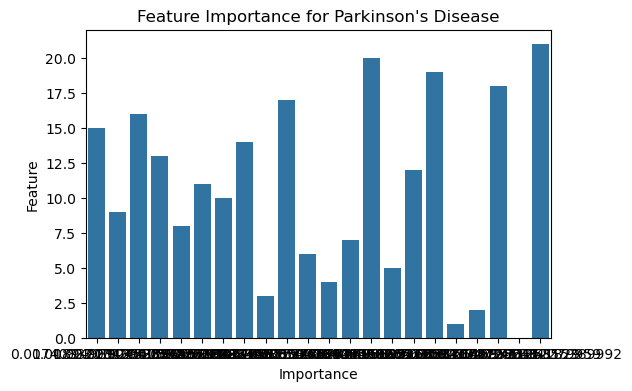

In [115]:
rf_parkinsons = RandomForestClassifier()
rf_parkinsons.fit(X_train_parkinsons, y_train_parkinsons)
plot_feature_importance(rf_parkinsons, pd.DataFrame(X_train_parkinsons), "Parkinson's Disease")

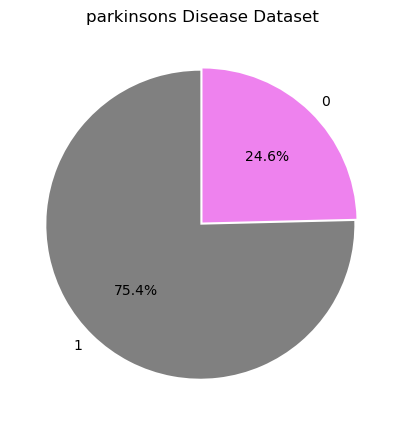

In [118]:
def plot_pie_chart(df, target_column, title): 
    counts = df[target_column].value_counts() 
    plt.figure(figsize=(6, 5)) 
    colors=['grey','violet']
    explode=(0.02,0)
    plt.pie(counts, labels=counts.index, autopct='%1.1f%%', startangle=90,colors=colors,explode=explode) 
    plt.title(title) 
    plt.show() 
# Plotting pie charts 
plot_pie_chart(parkinsons_df, 'status', 'parkinsons Disease Dataset') 

In [119]:
input_data_parkinsons = (0,120,66,49,175,25.8,0.587,51,76,99,45,0.649,357,76,89,679,123,23,66,45,89,0.466)

# changing the input_data to numpy array
input_data_parkinsons_as_numpy_array = np.asarray(input_data_parkinsons)

# reshape the array as we are predicting for one instance
input_data_parkinsons_reshaped = input_data_parkinsons_as_numpy_array.reshape(1,-1)

model=RandomForestClassifier()

model.fit(X_train_parkinsons, y_train_parkinsons)
y_pred = model.predict(X_test_parkinsons)
accuracy = accuracy_score(y_test_parkinsons, y_pred)
print(f"Accuracy of {model}: {accuracy}")
print(confusion_matrix(y_test_parkinsons, y_pred))
print(classification_report(y_test_parkinsons, y_pred))
prediction = model.predict(input_data_parkinsons_reshaped)
if (prediction[0] == 0):
    print(f'The person doesnot have parkinsons disease according to {model}')
else:
    print(f'The person is having parkinsons disease according to {model}')
           
# Example usage with dummy data (replace with actual data)
X_train = np.random.rand(100, 8) 
y_train = np.random.randint(2, size=100) 
X_test = np.random.rand(20, 8) 
y_test = np.random.randint(2, size=20) 


Accuracy of RandomForestClassifier(): 0.9487179487179487
[[ 5  2]
 [ 0 32]]
              precision    recall  f1-score   support

           0       1.00      0.71      0.83         7
           1       0.94      1.00      0.97        32

    accuracy                           0.95        39
   macro avg       0.97      0.86      0.90        39
weighted avg       0.95      0.95      0.95        39

The person is having parkinsons disease according to RandomForestClassifier()


In [120]:
import pickle

In [121]:
filename = 'parkinsons_disease_model.sav'
pickle.dump(model, open(filename, 'wb'))

In [123]:
# loading the saved model
loaded_model = pickle.load(open('parkinsons_disease_model.sav', 'rb'))

In [125]:
for column in parkinsons_df.columns:
  print(column)

MDVP:Fo(Hz)
MDVP:Fhi(Hz)
MDVP:Flo(Hz)
MDVP:Jitter(%)
MDVP:Jitter(Abs)
MDVP:RAP
MDVP:PPQ
Jitter:DDP
MDVP:Shimmer
MDVP:Shimmer(dB)
Shimmer:APQ3
Shimmer:APQ5
MDVP:APQ
Shimmer:DDA
NHR
HNR
status
RPDE
DFA
spread1
spread2
D2
PPE
